# Block 1: Load the dataset


In [1]:
import pandas as pd

DATASET_PATH = "../dataset/Base.csv"

df = pd.read_csv(DATASET_PATH)

# quick checks
print("Shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (1000000, 32)

Column types:
fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     in

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0



Missing values per column:
fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                

# 2

In [2]:
# === Block 2 (minimal): target balance + column type flags ===
import pandas as pd
import numpy as np

target_col = "fraud_bool"  # change only if your target has a different name

# 1) Target balance
if target_col in df.columns:
    counts = df[target_col].value_counts(dropna=False)
    props = (counts / len(df)).round(4)
    print("Target counts:\n", counts.to_string())
    print("\nTarget proportions:\n", props.to_string())
else:
    print(f"Target column '{target_col}' not found. Please update `target_col`.")

# 2) Basic column splits
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# 3) Numeric columns that are low-cardinality (likely categorical)
num_like_cat = [c for c in num_cols if df[c].nunique() <= 20 and c != target_col]

print("\n---")
print(f"Numeric columns ({len(num_cols)}): {num_cols[:15]}{'...' if len(num_cols)>15 else ''}")
print(f"Categorical/object columns ({len(cat_cols)}): {cat_cols[:15]}{'...' if len(cat_cols)>15 else ''}")
print(f"Numeric-looking columns with low cardinality (treat these as categorical): {num_like_cat}")


Target counts:
 fraud_bool
0    988971
1     11029

Target proportions:
 fraud_bool
0    0.989
1    0.011

---
Numeric columns (27): ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score']...
Categorical/object columns (5): ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Numeric-looking columns with low cardinality (treat these as categorical): ['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


# 3

In [3]:
# === Block 3: Encode categorical features ===
from sklearn.preprocessing import OneHotEncoder

# Split again for clarity
obj_cols = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
low_card_numlike = ['email_is_free', 'phone_home_valid', 'phone_mobile_valid',
                    'has_other_cards', 'foreign_request', 'keep_alive_session']

# 1) One-hot encode object columns (low cardinality)
df_encoded = pd.get_dummies(df, columns=obj_cols, drop_first=True)

# 2) Keep low-cardinality numeric-as-cat columns as they are (0/1 or small ints)
# Already usable — no changes needed for now

print("Encoded shape:", df_encoded.shape)
print("Example columns after encoding:", df_encoded.columns[:20])


Encoded shape: (1000000, 48)
Example columns after encoding: Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards'],
      dtype='object')


# 4

In [4]:
# === Block 4: Scale numeric features ===
from sklearn.preprocessing import StandardScaler

# Separate features and target
target_col = "fraud_bool"
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature matrix shape:", X_scaled.shape)
print("First row (scaled):", X_scaled[0][:10])  # preview first 10 features


Scaled feature matrix shape: (1000000, 47)
First row (scaled): [-0.90477846  1.70449737 -0.40227227 -0.69664367  0.52478204 -0.18933513
  4.63488549 -0.51094619  2.46919315  2.0829829 ]


# 5

In [5]:
# === Block 5: Correlation with Target ===
import numpy as np
import pandas as pd

# Re-create a DataFrame for scaled features (with column names)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add back target for correlation analysis
corr_df = pd.concat([X_scaled_df, y], axis=1)

# Compute correlations with target
corr_matrix = corr_df.corr()

# Extract only correlation with fraud_bool
target_corr = corr_matrix[target_col].drop(target_col)  # drop self-correlation

# Sort by absolute correlation
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

print("\nTop correlated features with target:")
print(target_corr_sorted.head(15))  # show top 15

# Decide threshold (example: keep features with abs(corr) > 0.05)
threshold = 0.05
important_features = target_corr_sorted[abs(target_corr_sorted) > threshold].index.tolist()

print(f"\nNumber of important features (|corr| > {threshold}): {len(important_features)}")
print("Example important features:", important_features[:10])



Top correlated features with target:
device_os_windows                   0.078263
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
keep_alive_session                 -0.050296
income                              0.045079
date_of_birth_distinct_emails_4w   -0.043224
name_email_similarity              -0.036720
device_os_other                    -0.036433
housing_status_BC                  -0.035980
device_distinct_emails_8w           0.035704
has_other_cards                    -0.035156
phone_home_valid                   -0.035128
current_address_months_count        0.033701
housing_status_BE                  -0.032781
Name: fraud_bool, dtype: float64

Number of important features (|corr| > 0.05): 5
Example important features: ['device_os_windows', 'credit_risk_score', 'proposed_credit_limit', 'customer_age', 'keep_alive_session']


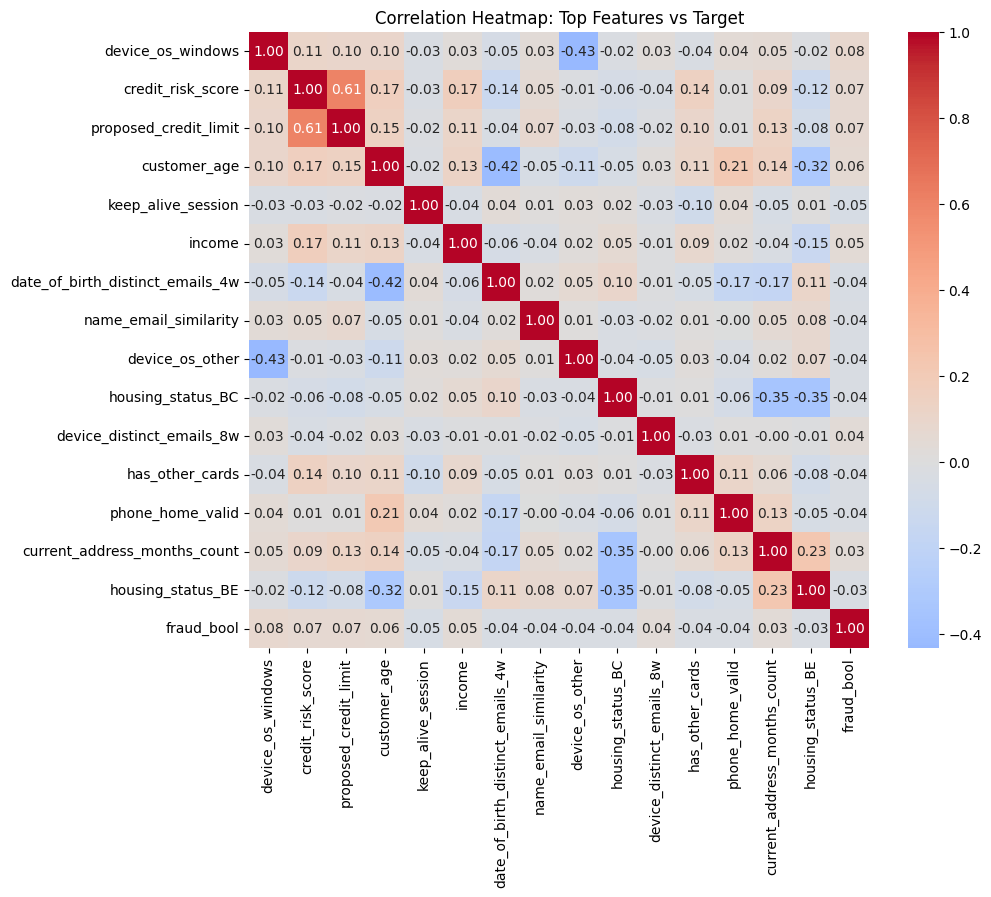

In [6]:
# === Block 6: Visualize Correlations ===
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for the top features
top_features = target_corr_sorted.head(15).index.tolist()
corr_subset = corr_df[top_features + [target_col]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap: Top Features vs Target")
plt.show()


In [7]:
# === Block 7A: Drop Redundant Features ===
# Compute correlation among features only
feature_corr = corr_df[important_features].corr().abs()

# Mask diagonal and lower triangle
upper_tri = feature_corr.where(np.triu(np.ones(feature_corr.shape), k=1).astype(bool))

# Drop features with correlation > 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

reduced_features = [f for f in important_features if f not in to_drop]

print("Highly correlated features to drop:", to_drop)
print("Remaining reduced features:", reduced_features)


Highly correlated features to drop: []
Remaining reduced features: ['device_os_windows', 'credit_risk_score', 'proposed_credit_limit', 'customer_age', 'keep_alive_session']


In [8]:
# === Block 8: Train/Test Split & Model Training ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Use reduced features only
X_final = X_scaled_df[reduced_features]
y_final = y

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# Simple logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))



Confusion Matrix:
[[197794      0]
 [  2206      0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.00      0.00      0.00      2206

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000


ROC-AUC Score: 0.7809817685718992


/Users/subin/Desktop/Project1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/subin/Desktop/Project1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/subin/Desktop/Project1/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [11]:
# VQC end-to-end cell (drop-in)
# Requirements: pip install pennylane torch scikit-learn

import numpy as np
import pandas as pd
import pennylane as qml
from pennylane import numpy as pnp
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve

# -----------------------
# USER: ensure X_final and y_final exist
# X_final: pandas.DataFrame or numpy array of features (reduced_features or full)
# y_final: pandas.Series or numpy array of 0/1 labels
# -----------------------
# Example guard (remove if satisfied)
assert 'X_final' in globals() and 'y_final' in globals(), "Please define X_final and y_final in the notebook/kernel."

# Convert to numpy arrays (safe conversion from DataFrame/Series)
if isinstance(X_final, pd.DataFrame) or isinstance(X_final, pd.Series):
    X = X_final.values
else:
    X = np.array(X_final)

if isinstance(y_final, (pd.Series, pd.DataFrame)):
    y = np.ravel(y_final.values)  # flatten to 1D
else:
    y = np.ravel(np.array(y_final))

# -----------------------
# Preprocessing: PCA to match qubit count, scaling, encoding range
# -----------------------
n_qubits = 5  # change as needed (3-6 recommended for starters)
if X.shape[1] > n_qubits:
    pca = PCA(n_components=n_qubits, random_state=42)
    X_reduced = pca.fit_transform(X)
else:
    # if fewer features than qubits, pad with zeros or repeat features
    X_reduced = X.copy()
    if X_reduced.shape[1] < n_qubits:
        # pad with zeros columns
        pad = np.zeros((X_reduced.shape[0], n_qubits - X_reduced.shape[1]))
        X_reduced = np.hstack([X_reduced, pad])

# Standardize and scale to [-pi, pi] for angle encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
# normalize per-feature to max abs = 1 then scale to pi range
max_abs = np.max(np.abs(X_scaled), axis=0, keepdims=True) + 1e-9
X_encoded = (X_scaled / max_abs) * np.pi

# Train/test split (stratify if possible)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Convert to torch tensors (fixes pandas Series -> torch.tensor error)
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(np.asarray(y_train, dtype=np.float32)).unsqueeze(1)
y_test_t  = torch.tensor(np.asarray(y_test, dtype=np.float32)).unsqueeze(1)

# -----------------------
# Build small VQC (PennyLane + torch)
# -----------------------
dev = qml.device("default.qubit", wires=n_qubits, analytic=True)

def variational_layer(weights):
    # weights: 2*n_qubits vector in this simple example
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
    for i in range(n_qubits):
        qml.RZ(weights[n_qubits + i], wires=i)

@qml.qnode(dev, interface="torch")
def circuit(inputs, weights):
    # Angle encoding
    for i in range(n_qubits):
        qml.RY(inputs[i], wires=i)
    variational_layer(weights)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class VQC(nn.Module):
    def __init__(self, n_qubits):
        super().__init__()
        self.n_qubits = n_qubits
        # small random init
        init_weights = 0.01 * torch.randn(2 * n_qubits, dtype=torch.float32)
        self.w = nn.Parameter(init_weights)
        self.clf = nn.Linear(n_qubits, 1)  # map quantum outputs to logit

    def forward(self, x):
        # x: (batch, n_qubits)
        outputs = []
        for i in range(x.shape[0]):
            # execute quantum circuit for each sample
            out = circuit(x[i], self.w)
            outputs.append(torch.stack(out))
        q_out = torch.stack(outputs)  # (batch, n_qubits)
        logits = self.clf(q_out)
        return logits

# -----------------------
# Training setup
# -----------------------
model = VQC(n_qubits)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Weighted BCE loss for class imbalance (pos_weight = neg/pos)
num_pos = np.sum(y_train == 1)
num_neg = np.sum(y_train == 0)
pos_weight = (num_neg / (num_pos + 1e-9)) if num_pos > 0 else 1.0
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(pos_weight, dtype=torch.float32))

n_epochs = 25
batch_size = 32

# Training loop
for epoch in range(n_epochs):
    model.train()
    perm = np.random.permutation(len(X_train))
    epoch_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        idx = perm[i:i+batch_size]
        xb = X_train_t[idx]
        yb = y_train_t[idx]
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * len(xb)
    epoch_loss /= len(X_train)

    # quick validation metric
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test_t).squeeze().numpy()
        val_probs = 1 / (1 + np.exp(-val_logits))
        auc = roc_auc_score(y_test, val_probs) if len(np.unique(y_test)) > 1 else float("nan")
    print(f"Epoch {epoch+1}/{n_epochs} — loss: {epoch_loss:.4f} — val ROC-AUC: {auc:.4f}")

# -----------------------
# Final evaluation: choose threshold with precision-recall curve
# -----------------------
model.eval()
with torch.no_grad():
    logits_test = model(X_test_t).squeeze().numpy()
    probs_test = 1 / (1 + np.exp(-logits_test))
    auc = roc_auc_score(y_test, probs_test) if len(np.unique(y_test)) > 1 else float("nan")
    print("\nFinal ROC-AUC:", auc)

    # Use precision-recall curve to pick a threshold favoring recall (tweak target_recall)
    precisions, recalls, thresholds = precision_recall_curve(y_test, probs_test)
    target_recall = 0.6  # set business-driven recall target
    # find threshold achieving recall >= target_recall
    idx = np.argmax(recalls >= target_recall) if np.any(recalls >= target_recall) else -1
    if idx == -1 or idx == len(thresholds):
        chosen_thresh = 0.5
    else:
        chosen_thresh = thresholds[idx]
    print("Chosen threshold (for recall >= {:.2f}): {:.4f}".format(target_recall, chosen_thresh))

    preds = (probs_test >= chosen_thresh).astype(int)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


TypeError: DefaultQubit.__init__() got an unexpected keyword argument 'analytic'